資料集說明：
1. id: type of machines
2. cycle: the time unit
3. setting1~3: settings of machines
4. s1~21: sensor readings for each cycle
5. RUL: Remaining Useful Life

In [32]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Bidirectional, GRU
import keras
import seaborn as sns
import keras.backend as K

from keras.layers import Activation
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam, RMSprop
from keras import regularizers, metrics
import datetime
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

os.getcwd()

'/Users/sunny89928/Desktop/碩一上/人工智慧/HW4'

# Define Features name

In [33]:
index_names = ['id', 'cycle']
setting_names = ['setting1', 'setting2', 'setting3']
sensor_names = ['s{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names
feature_names = setting_names + sensor_names

# Data Preprocessing

### 1. Read Data

In [34]:
# read training data - It is the aircraft engine run-to-failure data.
train_df = pd.read_csv('/Users/sunny89928/Desktop/碩一上/人工智慧/HW4/hw4_data/train.csv')
print('viwe the data shape', train_df.shape)
train_df.head()

viwe the data shape (20631, 27)


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,189
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,187


### 2. Visualize

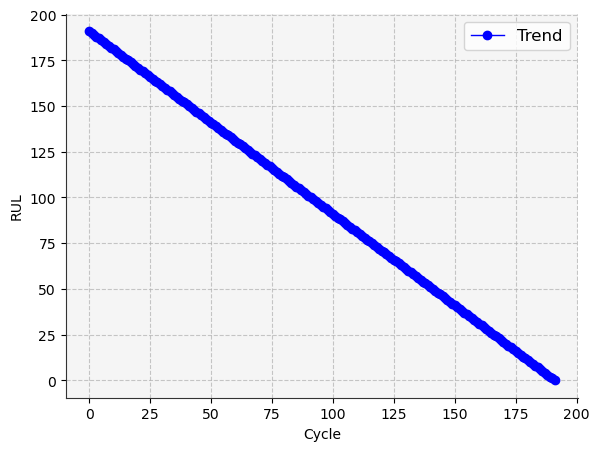

In [35]:
# 原本的RUL是線性下降的
plt.plot(train_df[train_df['id']==1]['RUL'],marker='o', linestyle='-', color='b', linewidth=1, label = 'Trend')
plt.xlabel('Cycle')
plt.ylabel('RUL')


# 添加图例，设置图例字体大小
plt.legend(fontsize=12)

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 设置刻度标签的字体大小
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 设置背景颜色
plt.gca().set_facecolor('#F5F5F5')

# 设置边框颜色
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('#333333')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['left'].set_color('#333333')

# 调整图形边距
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# 显示图形
plt.show()


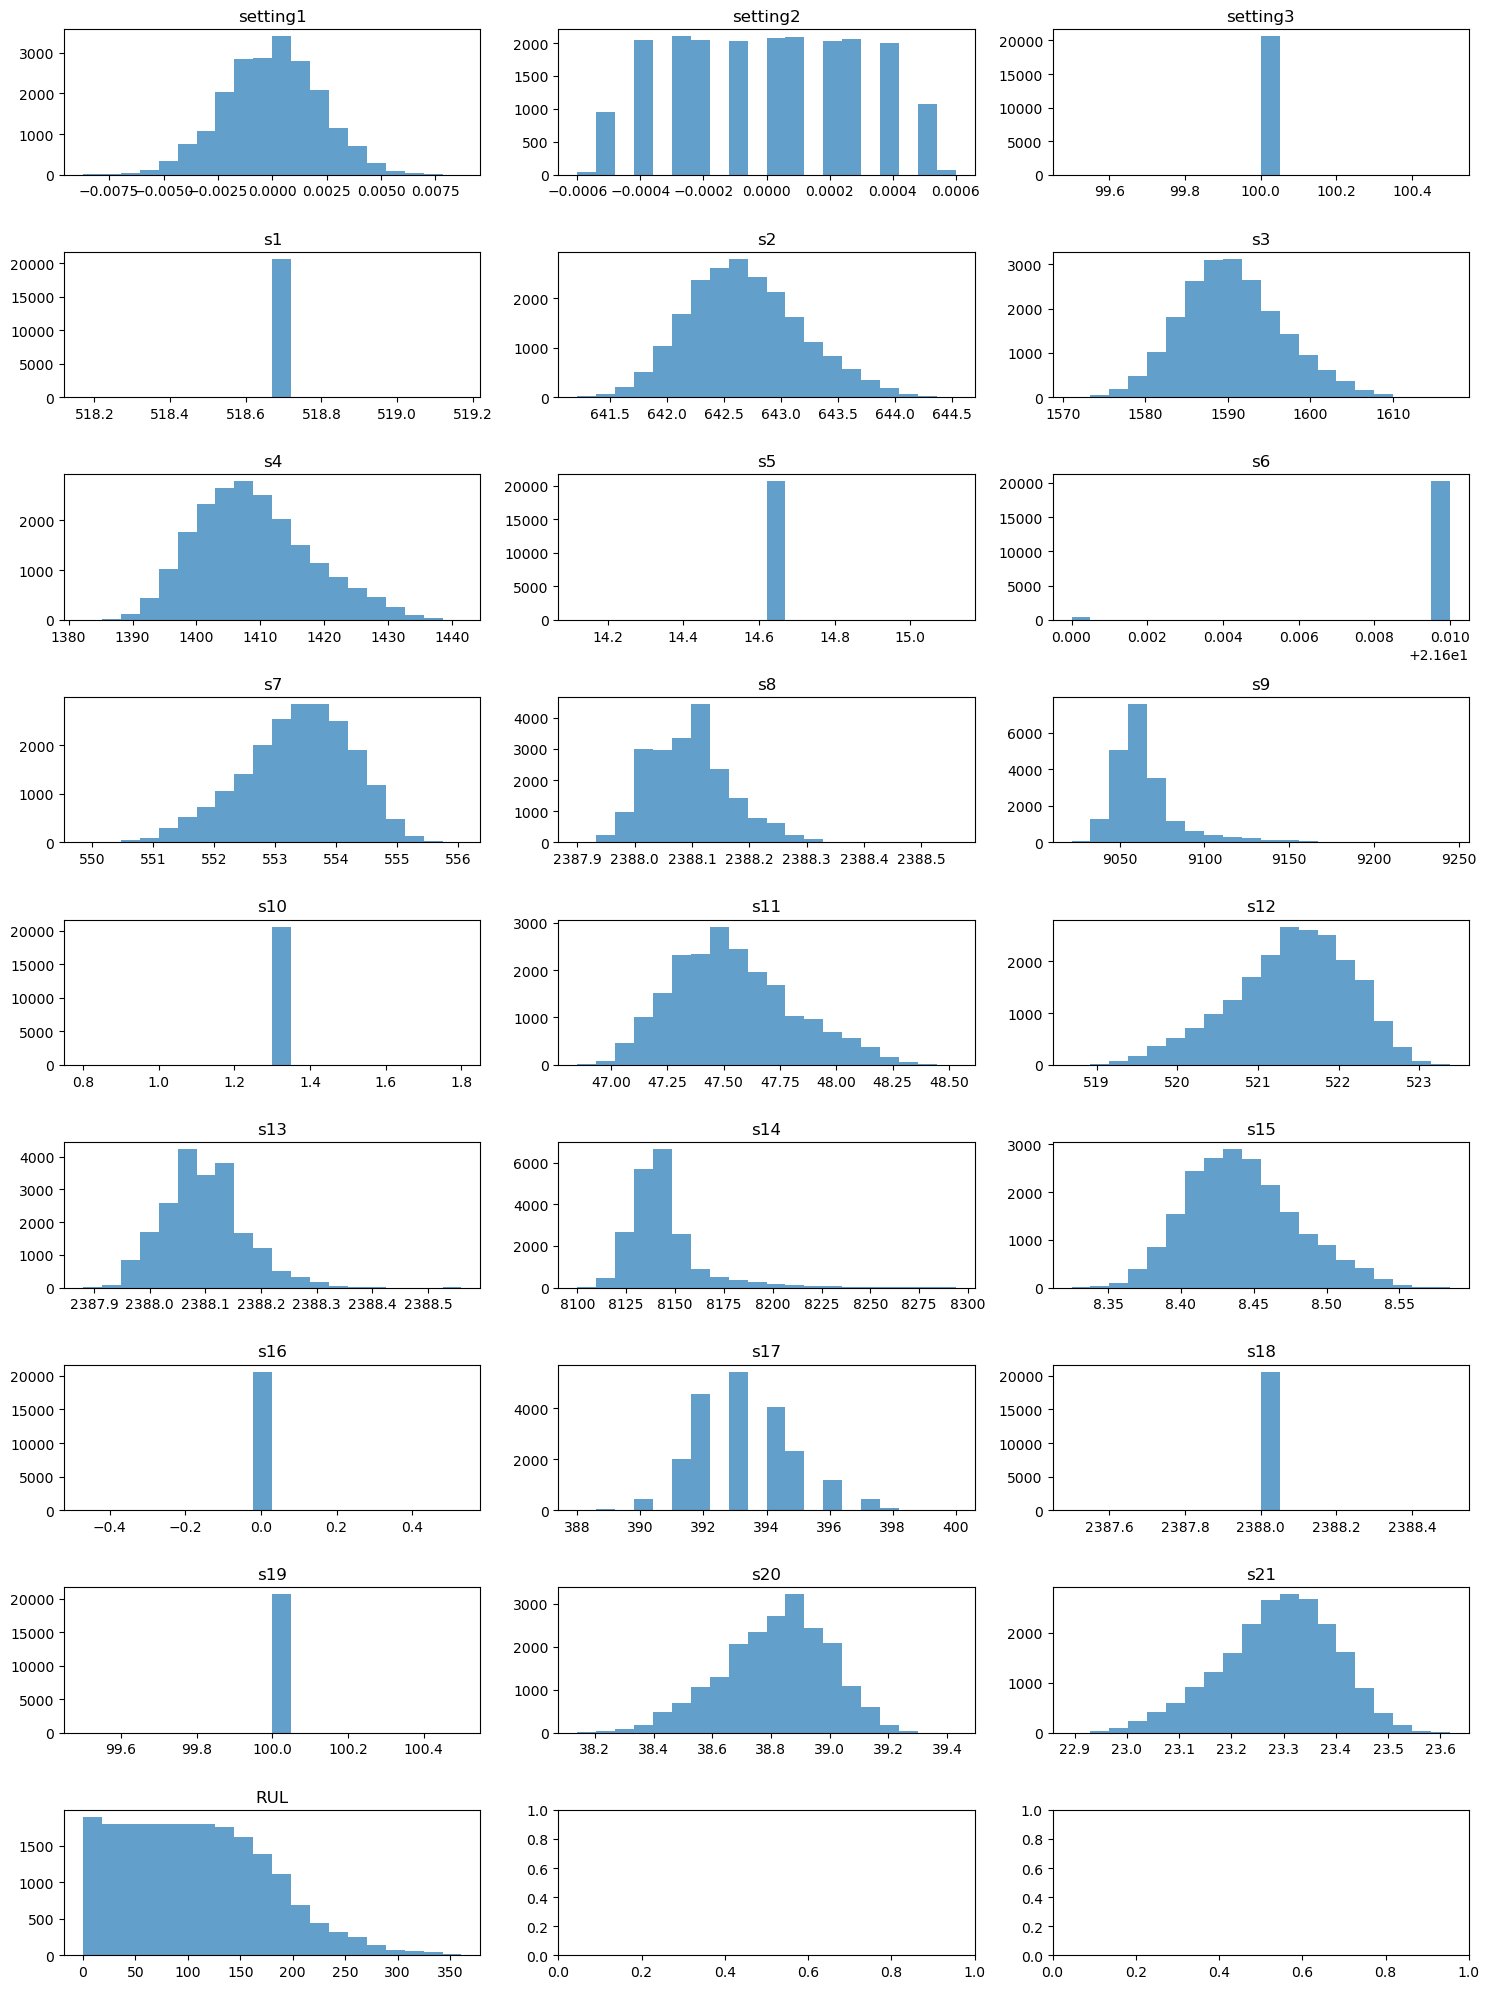

In [36]:
fig, axs = plt.subplots(9, 3, figsize=(15, 20))


axs[0, 0].hist(train_df['setting1'], bins=20, alpha=0.7)
axs[0, 0].set_title('setting1')

axs[0, 1].hist(train_df['setting2'], bins=20, alpha=0.7)
axs[0, 1].set_title('setting2')

axs[0, 2].hist(train_df['setting3'], bins=20, alpha=0.7)
axs[0, 2].set_title('setting3')

axs[1, 0].hist(train_df['s1'], bins=20, alpha=0.7)
axs[1, 0].set_title('s1')

axs[1, 1].hist(train_df['s2'],bins=20, alpha=0.7)
axs[1, 1].set_title('s2')

axs[1, 2].hist(train_df['s3'], bins=20,  alpha=0.7)
axs[1, 2].set_title('s3')

axs[2, 0].hist(train_df['s4'],bins=20, alpha=0.7)
axs[2, 0].set_title('s4')

axs[2, 1].hist(train_df['s5'],bins=20, alpha=0.7)
axs[2, 1].set_title('s5')

axs[2, 2].hist(train_df['s6'],bins=20, alpha=0.7)
axs[2, 2].set_title('s6')

axs[3, 0].hist(train_df['s7'],bins=20, alpha=0.7)
axs[3, 0].set_title('s7')

axs[3, 1].hist(train_df['s8'],bins=20, alpha=0.7)
axs[3, 1].set_title('s8')

axs[3, 2].hist(train_df['s9'],bins=20, alpha=0.7)
axs[3, 2].set_title('s9')

axs[4, 0].hist(train_df['s10'],bins=20, alpha=0.7)
axs[4, 0].set_title('s10')

axs[4, 1].hist(train_df['s11'],bins=20, alpha=0.7)
axs[4, 1].set_title('s11')

axs[4, 2].hist(train_df['s12'],bins=20, alpha=0.7)
axs[4, 2].set_title('s12')

axs[5, 0].hist(train_df['s13'],bins=20, alpha=0.7)
axs[5, 0].set_title('s13')

axs[5, 1].hist(train_df['s14'],bins=20, alpha=0.7)
axs[5, 1].set_title('s14')

axs[5, 2].hist(train_df['s15'],bins=20, alpha=0.7)
axs[5, 2].set_title('s15')

axs[6, 0].hist(train_df['s16'],bins=20, alpha=0.7)
axs[6, 0].set_title('s16')

axs[6, 1].hist(train_df['s17'],bins=20, alpha=0.7)
axs[6, 1].set_title('s17')

axs[6, 2].hist(train_df['s18'],bins=20, alpha=0.7)
axs[6, 2].set_title('s18')

axs[7, 0].hist(train_df['s19'],bins=20, alpha=0.7)
axs[7, 0].set_title('s19')

axs[7, 1].hist(train_df['s20'],bins=20, alpha=0.7)
axs[7, 1].set_title('s20')

axs[7, 2].hist(train_df['s21'],bins=20, alpha=0.7)
axs[7, 2].set_title('s21')

axs[8, 0].hist(train_df['RUL'],bins=20, alpha=0.7)
axs[8, 0].set_title('RUL')

plt.tight_layout()

plt.show()

由上面的圖片可知：每個感測器的分佈不一樣，所以要正規化，並將單一數值及機器設定值進行刪除

### 3. Feature Selection

In [37]:
train_df.drop(['setting1', 'setting2', 'setting3', 's1', 's5', 's6', 's10', 's16', 's18', 's19'],axis=1 , inplace=True)

### 4. 將RUL>125的數值設定為125 

In [40]:
def count_values_in_ranges(data, ranges):
    # 初始化一个字典来存储每个区间中值的计数
    range_counts = {r: 0 for r in ranges}

    # 遍历数据并将值分配到相应的区间中
    for value in data:
        for r in ranges:
            if r[0] <= value <= r[1]:
                range_counts[r] += 1

    return range_counts

# 输入数据和区间列表
ranges = [(0, 25), (25, 50), (50, 75), (75, 100), (100, 125), (125, 150), (150, 175), (175, 200), (200, 225),(225, float('inf'))]

# 调用函数获取区间中值的计数
result = count_values_in_ranges(train_df['RUL'], ranges)

# 打印结果
for r, count in result.items():
    print(f"區間 {r}: 出現次數 {count} 次")


區間 (0, 25): 出現次數 2600 次
區間 (25, 50): 出現次數 2600 次
區間 (50, 75): 出現次數 2600 次
區間 (75, 100): 出現次數 2600 次
區間 (100, 125): 出現次數 2600 次
區間 (125, 150): 出現次數 2524 次
區間 (150, 175): 出現次數 2163 次
區間 (175, 200): 出現次數 1654 次
區間 (200, 225): 出現次數 887 次
區間 (225, inf): 出現次數 1143 次


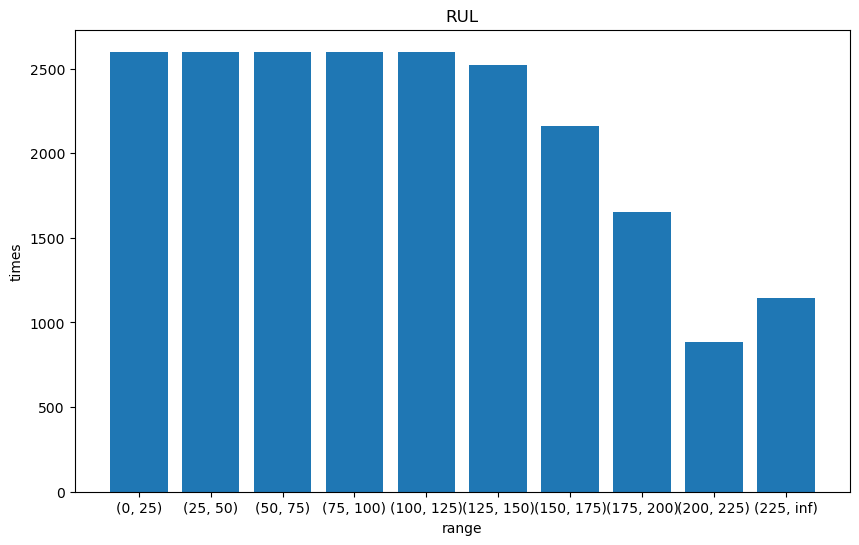

In [41]:
range_labels = [str(r) for r in result.keys()]
counts = list(result.values())

plt.figure(figsize=(10, 6))  

plt.bar(range_labels, counts)
plt.xlabel('range')
plt.ylabel('times')
plt.title('RUL')

plt.show()

In [30]:
train_df.loc[train_df['RUL'] > 125, 'RUL'] = 125

### 5. Normalization

In [80]:
scaler = StandardScaler()

train_normalize = train_df
features_to_normalize = ['s2', 's3', 's4', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']
train_normalize[features_to_normalize] = scaler.fit_transform(train_normalize[features_to_normalize])

train_normalize 

,id,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL
0,1,1,-1.721725,-0.134255,-0.925936,1.121141,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427,125
1,1,2,-1.061780,0.211528,-0.643726,0.431930,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922,125
2,1,3,-0.661813,-0.413166,-0.525953,1.008155,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423,125
3,1,4,-0.661813,-1.261314,-0.784831,1.222827,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598,0.777792,125
4,1,5,-0.621816,-1.251528,-0.301518,0.714393,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253,1.059552,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,1.618000,1.216258,2.188375,-2.189329,1.315066,0.012547,1.980044,-2.607969,2.278282,-0.322542,1.425294,2.446751,-1.805173,-2.921113,4
20627,100,197,1.717992,2.279706,2.738351,-2.833345,1.878576,-0.006020,1.867718,-2.350355,1.722087,-0.380207,1.913240,1.155367,-2.856395,-1.203764,3
20628,100,198,1.478011,1.946971,2.138377,-2.742957,2.019453,0.029755,2.054927,-1.902919,2.000184,-0.141684,3.265092,3.092444,-2.081810,-3.292481,2
20629,100,199,1.098043,2.403666,1.955051,-3.036719,2.160330,0.383884,3.178182,-2.363913,1.861136,-0.233948,2.579834,1.155367,-2.911722,-2.085072,1


### 6. Exponential Smoothing

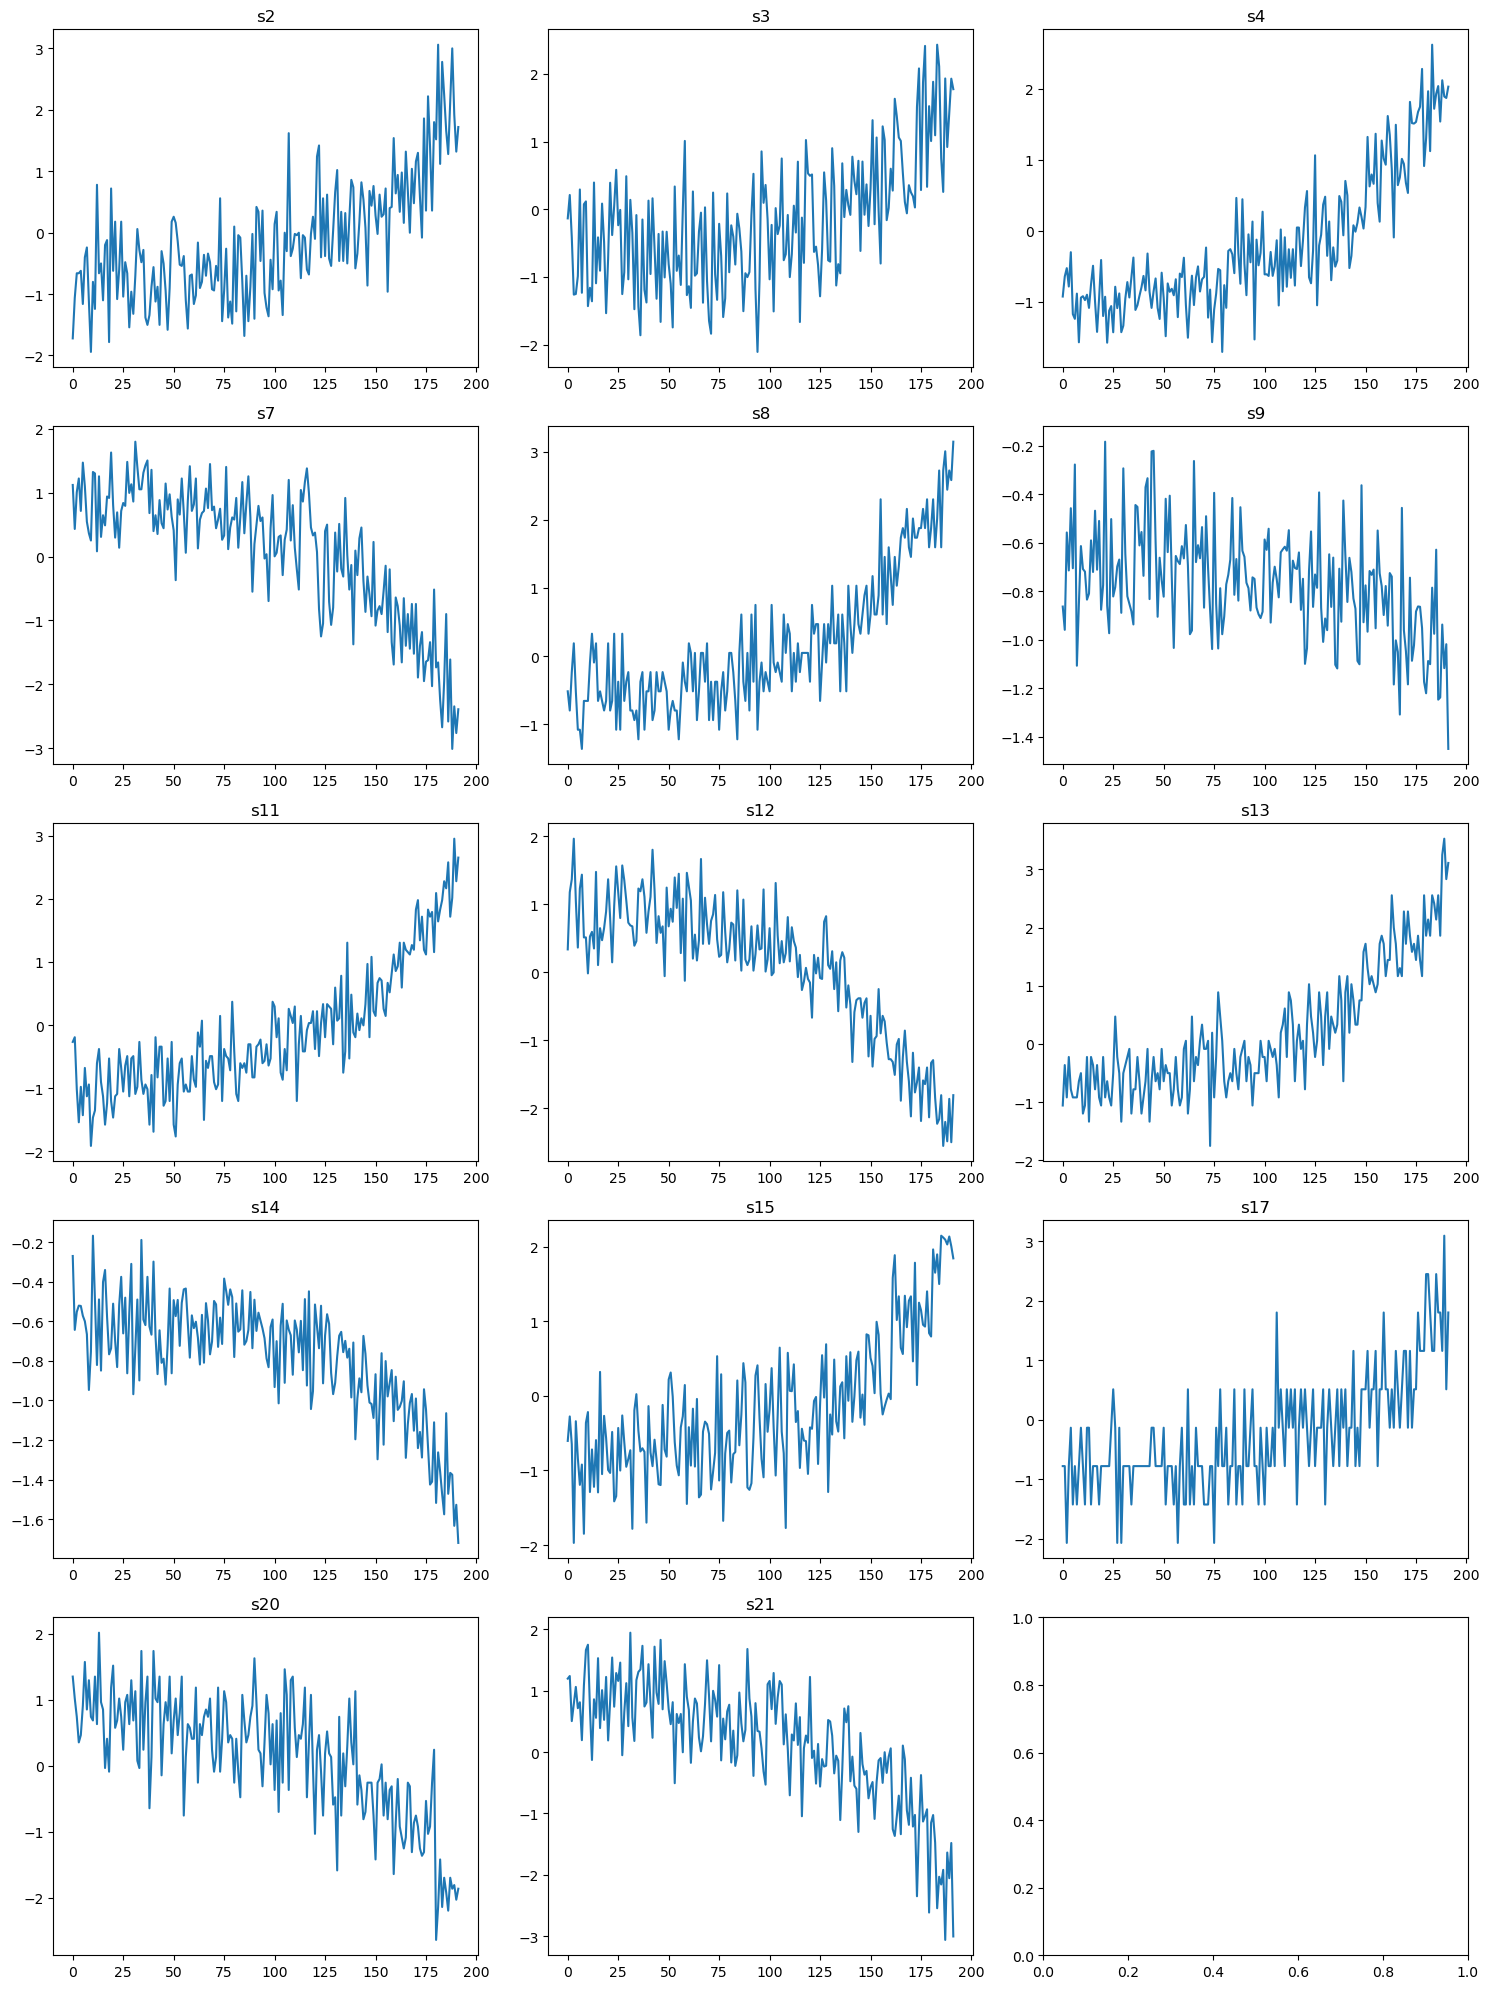

In [81]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20))


axs[0, 0].plot(train_normalize[train_normalize['id']==1]['s2'])
axs[0, 0].set_title('s2')

axs[0, 1].plot(train_normalize[train_normalize['id']==1]['s3'])
axs[0, 1].set_title('s3')

axs[0, 2].plot(train_normalize[train_normalize['id']==1]['s4'])
axs[0, 2].set_title('s4')

axs[1, 0].plot(train_normalize[train_normalize['id']==1]['s7'])
axs[1, 0].set_title('s7')

axs[1, 1].plot(train_normalize[train_normalize['id']==1]['s8'])
axs[1, 1].set_title('s8')

axs[1, 2].plot(train_normalize[train_normalize['id']==1]['s9'])
axs[1, 2].set_title('s9')

axs[2, 0].plot(train_normalize[train_normalize['id']==1]['s11'])
axs[2, 0].set_title('s11')

axs[2, 1].plot(train_normalize[train_normalize['id']==1]['s12'])
axs[2, 1].set_title('s12')

axs[2, 2].plot(train_normalize[train_normalize['id']==1]['s13'])
axs[2, 2].set_title('s13')

axs[3, 0].plot(train_normalize[train_normalize['id']==1]['s14'])
axs[3, 0].set_title('s14')

axs[3, 1].plot(train_normalize[train_normalize['id']==1]['s15'])
axs[3, 1].set_title('s15')

axs[3, 2].plot(train_normalize[train_normalize['id']==1]['s17'])
axs[3, 2].set_title('s17')

axs[4, 0].plot(train_normalize[train_normalize['id']==1]['s20'])
axs[4, 0].set_title('s20')

axs[4, 1].plot(train_normalize[train_normalize['id']==1]['s21'])
axs[4, 1].set_title('s21')


plt.tight_layout()

plt.show()

In [83]:
import statsmodels.api as sm
columns_to_smooth = features_to_normalize
train_smooth = train_normalize
    
train_smooth[columns_to_smooth] = train_smooth.groupby('id')[columns_to_smooth].apply(lambda x: x.ewm(alpha=0.4).mean()).reset_index(level=0, drop=True)

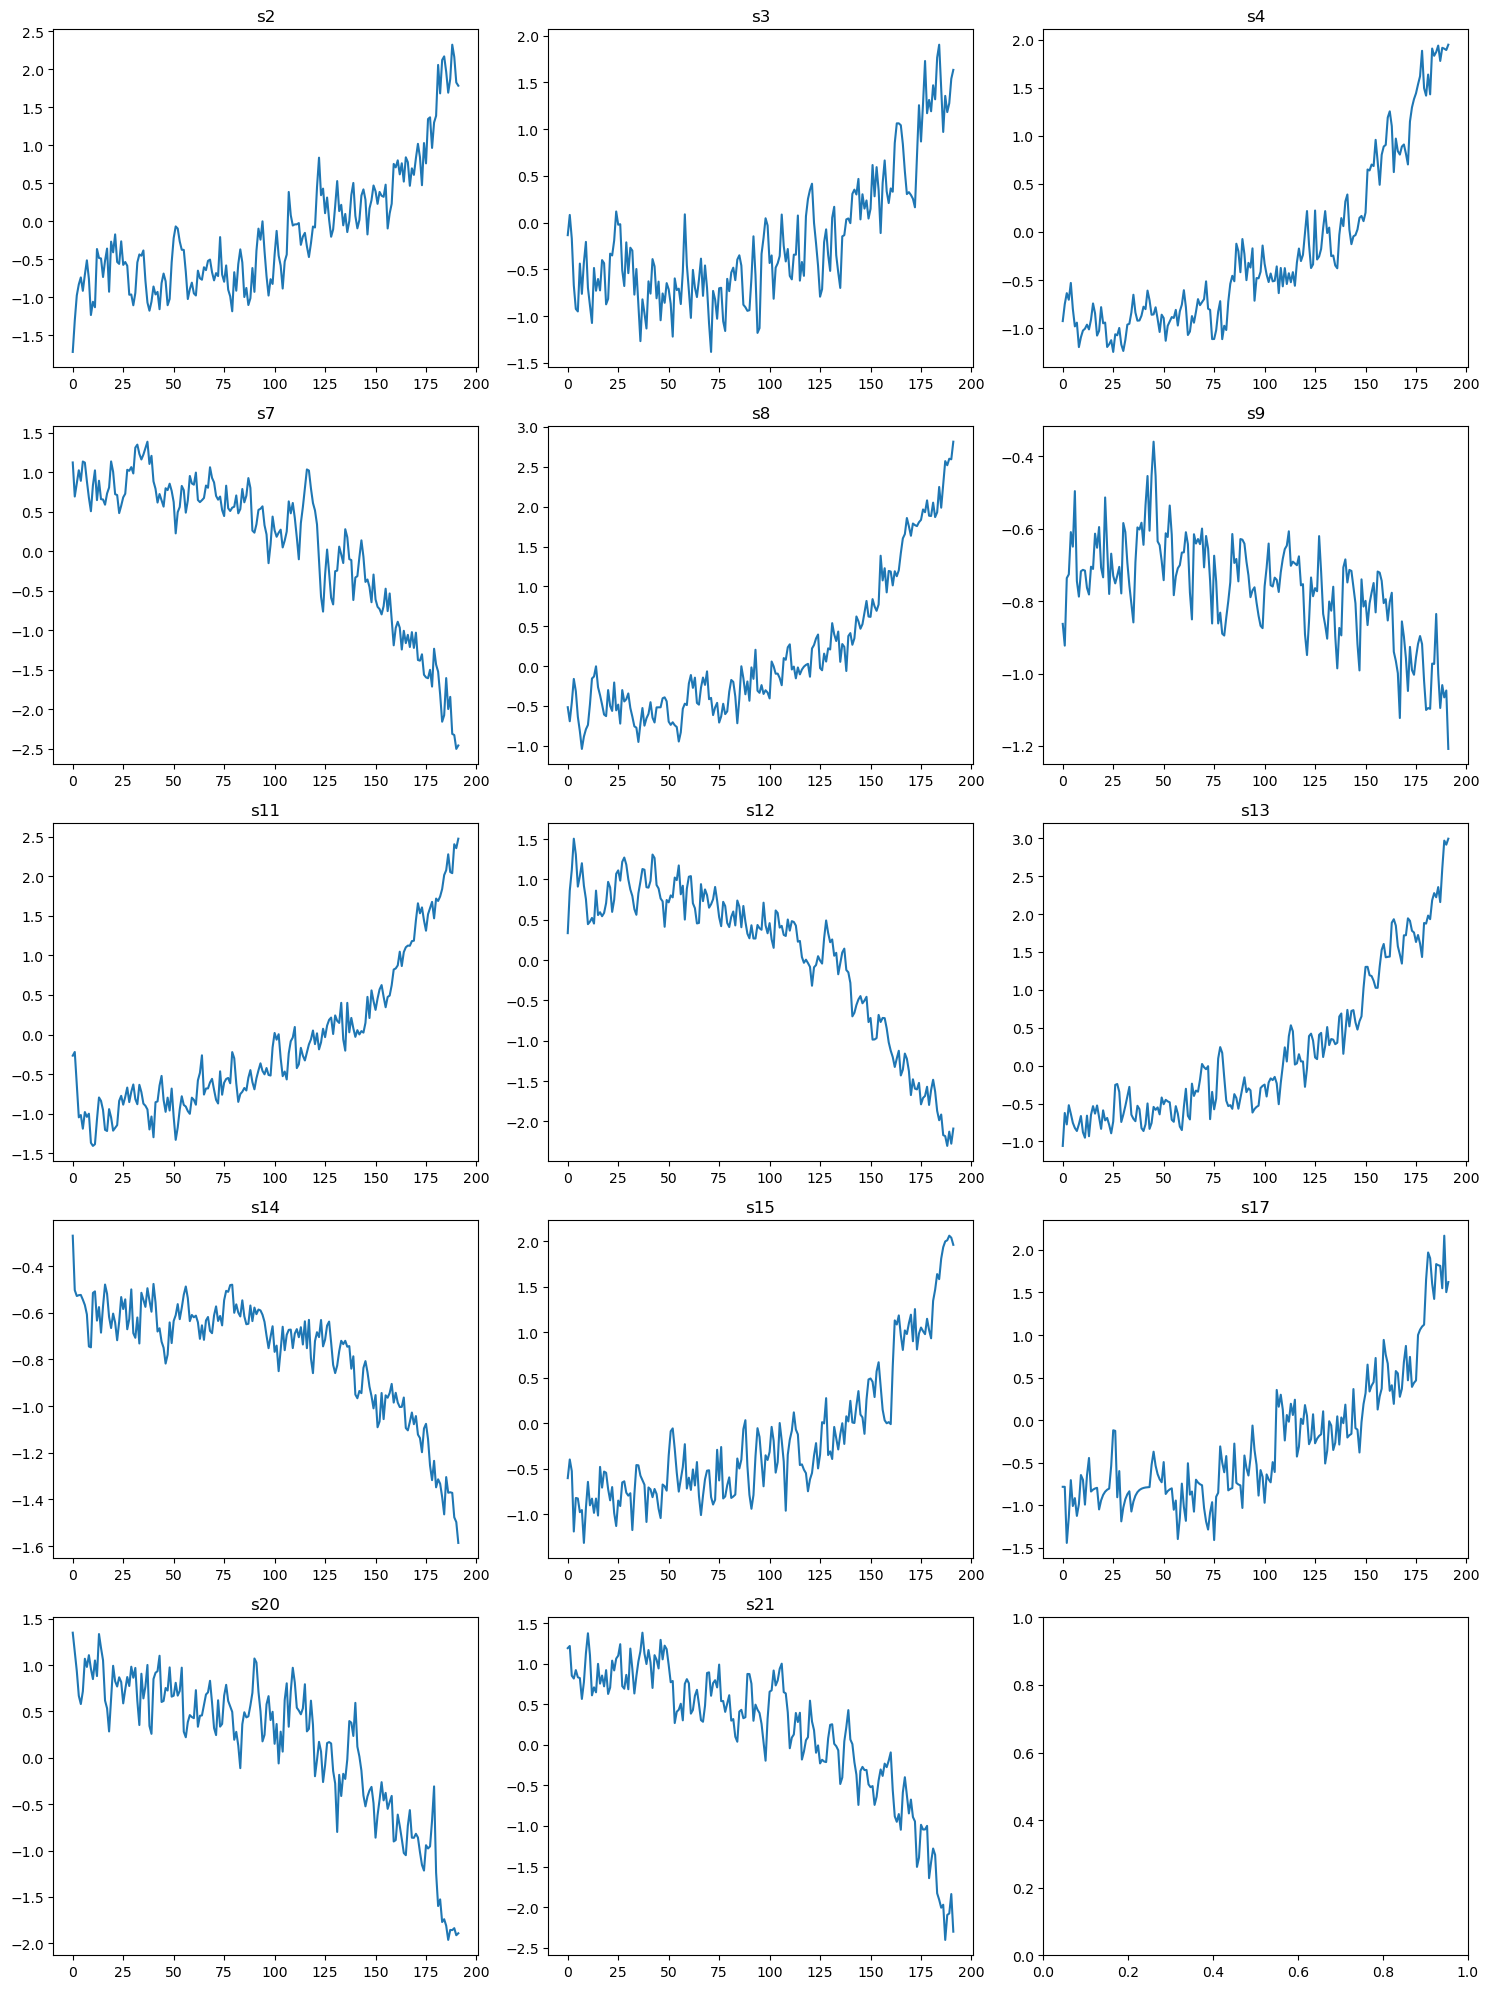

In [84]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20))


axs[0, 0].plot(train_normalize[train_normalize['id']==1]['s2'])
axs[0, 0].set_title('s2')

axs[0, 1].plot(train_normalize[train_normalize['id']==1]['s3'])
axs[0, 1].set_title('s3')

axs[0, 2].plot(train_normalize[train_normalize['id']==1]['s4'])
axs[0, 2].set_title('s4')

axs[1, 0].plot(train_normalize[train_normalize['id']==1]['s7'])
axs[1, 0].set_title('s7')

axs[1, 1].plot(train_normalize[train_normalize['id']==1]['s8'])
axs[1, 1].set_title('s8')

axs[1, 2].plot(train_normalize[train_normalize['id']==1]['s9'])
axs[1, 2].set_title('s9')

axs[2, 0].plot(train_normalize[train_normalize['id']==1]['s11'])
axs[2, 0].set_title('s11')

axs[2, 1].plot(train_normalize[train_normalize['id']==1]['s12'])
axs[2, 1].set_title('s12')

axs[2, 2].plot(train_normalize[train_normalize['id']==1]['s13'])
axs[2, 2].set_title('s13')

axs[3, 0].plot(train_normalize[train_normalize['id']==1]['s14'])
axs[3, 0].set_title('s14')

axs[3, 1].plot(train_normalize[train_normalize['id']==1]['s15'])
axs[3, 1].set_title('s15')

axs[3, 2].plot(train_normalize[train_normalize['id']==1]['s17'])
axs[3, 2].set_title('s17')

axs[4, 0].plot(train_normalize[train_normalize['id']==1]['s20'])
axs[4, 0].set_title('s20')

axs[4, 1].plot(train_normalize[train_normalize['id']==1]['s21'])
axs[4, 1].set_title('s21')


plt.tight_layout()

plt.show()

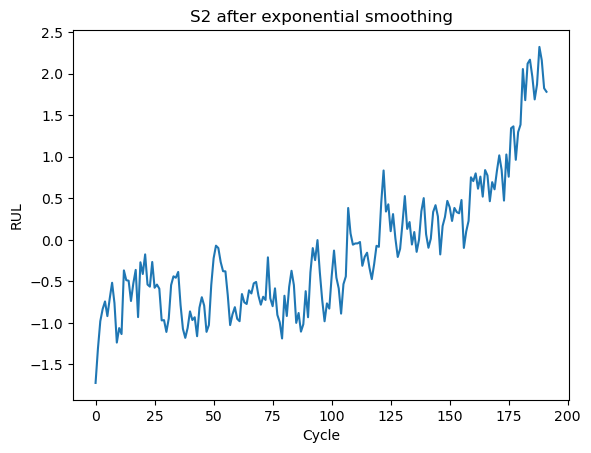

In [86]:
plt.plot(train_normalize[train_normalize['id']==1]['s2'])
plt.xlabel('Cycle')
plt.ylabel('RUL')
plt.title('S2 after exponential smoothing')
plt.show()

### 7. Group Data

In [44]:
group = train_smooth.groupby(by="id")

# Model

In [10]:
sequence_length =30

In [11]:
# function to reshape features into (samples, time steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
    # for one id I put all the rows in a single matrix
    data_matrix = id_df[seq_cols].values
    num_elements = data_matrix.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_matrix[start:stop, :]
        


# generator for the sequences
seq_gen = (list(gen_sequence(train_smooth[train_smooth['id']==id], sequence_length, columns_to_smooth)) 
           for id in train_smooth['id'].unique())

# generate sequences and convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)

# function to generate labels
def gen_labels(id_df, seq_length, label):
    data_matrix = id_df[label].values
    num_elements = data_matrix.shape[0]
    return data_matrix[seq_length:num_elements, :]

# generate labels
label_gen = [gen_labels(train_smooth[train_smooth['id']==id], sequence_length, ['RUL']) 
             for id in train_smooth['id'].unique()]

label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(17631, 1)

In [12]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(seq_array, label_array, test_size=0.05, random_state=42)

In [13]:
# 額外定義的部分
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir))

def get_today():
    today = datetime.date.today()
    date_obj = datetime.datetime.strptime(f"{today}", "%Y-%m-%d")
    formatted_date = date_obj.strftime("%m%d")
    return formatted_date

In [14]:
date = get_today()

if not os.path.exists(os.path.join(os.getcwd(), f'models/{str(date)}')):
    os.makedirs(os.path.join(os.getcwd(), f'models/{date}'))
    os.makedirs(os.path.join(os.getcwd(), f'submission/{date}'))
    os.makedirs(os.path.join(os.getcwd(), f'plots/{date}'))
    

## LSTM

In [15]:
# Define LSTM model
class rnn_model(object):
    def __init__(self, cell, first_layer_unit, second_layer_unit, nb_out, dropout, lr, l2_reg):
        self.cell = cell
        self.first_layer_unit = first_layer_unit
        self.second_layer_unit = second_layer_unit
        self.dropout = dropout
        self.lr = lr
        self.cell = cell
        self.l2_reg = l2_reg
        self.nb_out = nb_out

    def build(self, input_shape):    # 創建一個模型出來
        
        # 1. 模型初始化 （定義模型結構）
        cell_class = getattr(keras.layers, self.cell)
        
        self.model = Sequential()
        self.model.add(cell_class(self.first_layer_unit, input_shape=input_shape, activation='relu'))
        self.model.add(Dropout(self.dropout))
        # self.model.add(cell_class(self.second_layer_unit, return_sequences=False, activation='relu'))
        # self.model.add(Dropout(self.dropout))
        
        # self.model.add(Dense(units=self.nb_out))
        self.model.add(Dense(self.nb_out, 'linear'))
        
        # 2. 模型編譯 （加入優化器、定義梯度下降的 loss function）
        _adam = Adam(learning_rate=0.001)
        _rmsprop = RMSprop()
        self.model.compile(loss='mean_squared_error', optimizer=_adam, metrics=['mae'])
        print(self.model.summary())
        
        return self.model
    
    def restore(self, today): # restore 某次 epochs 的模型參數
        self.best_model = load_model(os.path.join(os.getcwd(), f'models/{str(today)}/{self.cell}_{str(self.first_layer_unit)}_{str(self.second_layer_unit)}_{self.lr}.h5'))
        _adam = Adam()
        # _rmsprop = RMSprop()
        self.model.compile(loss='mean_squared_error', optimizer=_adam, metrics=['mae'])
        
    def predict(self, residual_X): # 針對最佳模型進行預測
        rnn_prediction = self.best_model.predict(residual_X)
        return rnn_prediction

    def visualize_loss_plot(self, history, today): # 畫圖
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Train MSE')
        plt.plot(history.history['val_loss'], label='Validation MSE')
        plt.xlabel('Epochs')
        plt.ylabel('MSE')
        plt.legend()
        plt.title('Train vs Validation MSE')
        plt.savefig(os.path.join(os.getcwd(), f'plots/{str(today)}/{self.cell}_{str(self.first_layer_unit)}_{str(self.second_layer_unit)}_{str(self.lr)}.png'))
    

.......... 模型建立中 ..........
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                13000     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 13051 (50.98 KB)
Trainable params: 13051 (50.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
.......... 開始訓練模型 ..........
Epoch 1/200
513/524 [============================>.] - ETA: 0s - loss: 2002.6154 - mae: 32.1697
Epoch 1: val_loss improved from inf to 451.32190, saving model to /Users/sunny89928/Desktop/models/1218/LSTM_50_0_0.0005.h5
52

/Users/sunny89928/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


520/524 [============================>.] - ETA: 0s - loss: 563.5656 - mae: 18.2809
Epoch 2: val_loss improved from 451.32190 to 313.99051, saving model to /Users/sunny89928/Desktop/models/1218/LSTM_50_0_0.0005.h5
524/524 [==============================] - 2s 4ms/step - loss: 563.6874 - mae: 18.2825 - val_loss: 313.9905 - val_mae: 13.6001 - lr: 0.0010
Epoch 3/200
517/524 [============================>.] - ETA: 0s - loss: 471.1303 - mae: 16.6242
Epoch 3: val_loss improved from 313.99051 to 301.78629, saving model to /Users/sunny89928/Desktop/models/1218/LSTM_50_0_0.0005.h5
524/524 [==============================] - 2s 4ms/step - loss: 471.2772 - mae: 16.6261 - val_loss: 301.7863 - val_mae: 13.7063 - lr: 0.0010
Epoch 4/200
519/524 [============================>.] - ETA: 0s - loss: 401.2764 - mae: 15.2072
Epoch 4: val_loss improved from 301.78629 to 244.18980, saving model to /Users/sunny89928/Desktop/models/1218/LSTM_50_0_0.0005.h5
524/524 [==============================] - 2s 4ms/step - 

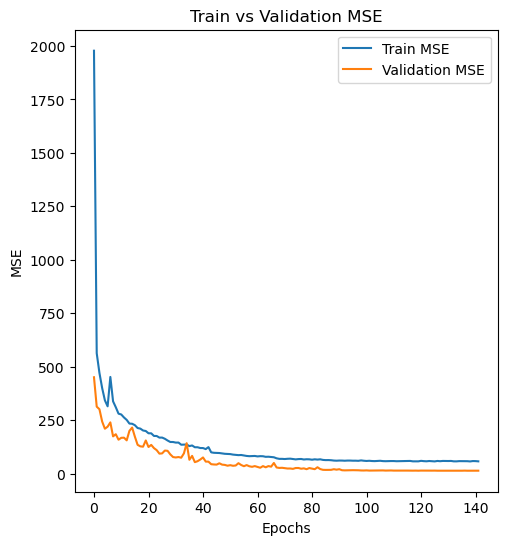

In [16]:
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]
input_shape = (sequence_length, nb_features)
cell_t = 'LSTM'
first_layer_unit = 50
second_layer_unit = 0
lr = 0.0005

# 1. 首先要先建立模型本體
print(".......... 模型建立中 ..........")
model = rnn_model(cell_t, first_layer_unit, second_layer_unit, nb_out, 0.2, lr, 1e-4)
rnn_model = model.build(input_shape) 

# 2. 定義 callback fuunction 
checkpoint_dir = os.path.join(os.getcwd(), f'models/{str(date)}/{cell_t}_{first_layer_unit}_{second_layer_unit}_{lr}.h5') # 設定 checkpoint model 要存在哪個路徑下
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # early stooping
checkpoint_callback = ModelCheckpoint(checkpoint_dir, monitor='val_loss', verbose=1, mode='min', save_best_only=True) # 存取目前最佳的 epochs
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5) # 當 loss 不再下降後，動態調整 learning rate 比率

# 3. 開始訓練模型，並把模型的訓練 log 存進去 history 變數中
print(".......... 開始訓練模型 ..........")
current_model = rnn_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), callbacks=[checkpoint_callback, early_stopping,lr_reduction])
print(current_model.history.keys())
print(".......... 訓練模型成功 ..........")
model.visualize_loss_plot(current_model, date)

In [17]:
# read training data - It is the aircraft engine run-to-failure data.
test_df = pd.read_csv('/Users/sunny89928/Desktop/碩一上/人工智慧/HW4/hw4_data/test.csv')
print('viwe the data shape', train_df.shape)
test_df.head()

viwe the data shape (20631, 17)


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100,39.08,23.4166
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100,39.00,23.3737
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100,38.99,23.4130


In [18]:
test_df.drop(['setting1', 'setting2', 'setting3', 's1', 's5', 's6', 's10', 's16', 's18', 's19'],axis=1 , inplace=True)
features_to_normalize = ['s2', 's3', 's4', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']
# test_df[features_to_normalize] = test_df.groupby('id')[features_to_normalize].apply(lambda x: x.ewm(alpha=0.4).mean()).reset_index(level=0, drop=True)
test_df[features_to_normalize] = scaler.transform(test_df[features_to_normalize])
test_df[features_to_normalize] = test_df.groupby('id')[features_to_normalize].apply(lambda x: x.ewm(alpha=0.4).mean()).reset_index(level=0, drop=True)
group_test_by_id = test_df.groupby('id')

In [19]:
# Assuming you have a line like this to define 'seq_array_test_last'
seq_array_test_last = [test_df[test_df['id'] == id][features_to_normalize].values[-sequence_length:]
                       for id in test_df['id'].unique() if len(test_df[test_df['id'] == id]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)
print(seq_array_test_last.shape)

print(".......... 開始進行預測 ..........")
model.restore(date)
# Predict using the trained LSTM model on the test set
y_pred_test = model.predict(seq_array_test_last)

# Flatten sequence data to a 2D array
X_test_last = y_pred_test.reshape((y_pred_test.shape[0], y_pred_test.shape[1]))


(97, 30, 14)
.......... 開始進行預測 ..........
4/4 [==============================] - 0s 2ms/step


In [23]:
# Save predictions to a CSV file
test_set = pd.DataFrame(X_test_last, columns=['RUL'])
test_set.index = test_set.index + 1
test_set.to_csv('submit100.csv', index_label='id')
test_set

,RUL
1,119.140541
2,129.083130
3,34.728420
4,105.929886
5,100.263512
...,...
93,41.184589
94,54.188046
95,111.269508
96,122.781303
